## Task 1: Introduction

Welcome to **Sentiment Analysis with Keras and TensorFlow**.

## Task 2: The IMDB Reviews Dataset


In [1]:
from tensorflow.python.keras.datasets import imdb
(x_train, y_train),(x_test,y_test)=imdb.load_data(num_words=1000)

In [2]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [3]:
print(y_train[0])

1


In [4]:
class_names=['Negative', 'Positive']

In [5]:
word_index=imdb.get_word_index()
print(word_index['hello'])

4822


## Task 3: Decoding the Reviews


In [7]:
reverse_word_index=dict((value,key) for key, value in word_index.items())
def decode(review):
    text=''
    for i in review:
        text+=reverse_word_index[i]
        text+=' '
    return text

In [8]:
decode(x_train[0])

"the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wi

In [9]:
def show_len():
    print('length of 1st training example:', len(x_train[0]))
    print('length of 2nd training example:', len(x_train[1]))
    print('length of 1st test example:', len(x_test[0]))
    print('length of 2nd test example:', len(x_test[1]))
show_len()

length of 1st training example: 218
length of 2nd training example: 189
length of 1st test example: 68
length of 2nd test example: 260



## Task 4: Padding the Examples



In [10]:
word_index['the']

1

In [11]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(x_train, value=word_index['the'], padding='post', maxlen=256)
x_test=pad_sequences(x_test, value=word_index['the'], padding='post', maxlen=256)

In [12]:
show_len()

length of 1st training example: 256
length of 2nd training example: 256
length of 1st test example: 256
length of 2nd test example: 256


In [13]:
decode(x_train[0])

"the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wi




## Task 5: Creating and Training the Model


In [16]:
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D
model=Sequential([
    Embedding(10000,16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log=LambdaCallback(on_epoch_end=lambda e,l: print(e, end='.'))
E=10
h=model.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=E,
    callbacks=[simple_log],
    verbose=False
)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.1.2.3.4.5.6.7.8.9.

## Task 6: Predictions and Evaluation



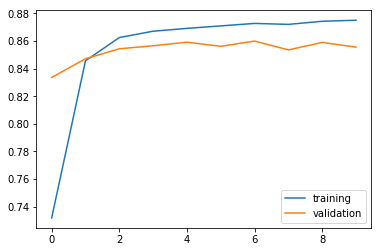

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(E), h.history['acc'], label='training')
plt.plot(range(E), h.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [22]:
loss,acc=model.evaluate(x_test,y_test)
print('Test set accuracy:',acc*100)

25000/25000 [==============================] - 1s 59us/step
Test set accuracy: 86.012


In [23]:
decode(x_train[0])

"the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wi